PERBANDINGAN KINERJA RANDOM FOREST DAN LOGISTIC REGRESSION
PADA DATA PREDIKSI PEMBELIAN PELANGGAN

A. DATASET
--------------------------------------------------
Nama Dataset: Customer Purchase Prediction Dataset
Jumlah sampel: 96
Jumlah fitur: 2
Target yang diprediksi: will_buy (1 = akan membeli, 0 = tidak akan membeli)

Atribut/Fitur:
- age: Usia pelanggan (tahun)
- income: Pendapatan pelanggan (rupiah)
- will_buy: Target variabel (0/1)

Statistik Deskriptif:
             age       income   will_buy
count  96.000000     96.00000  96.000000
mean   39.041667  50031.25000   0.697917
std     8.973548  15854.23943   0.461571
min    22.000000  28000.00000   0.000000
25%    31.750000  37000.00000   0.000000
50%    38.000000  45000.00000   1.000000
75%    47.000000  61250.00000   1.000000
max    56.000000  81000.00000   1.000000

Distribusi Target:
will_buy
1    67
0    29
Name: count, dtype: int64


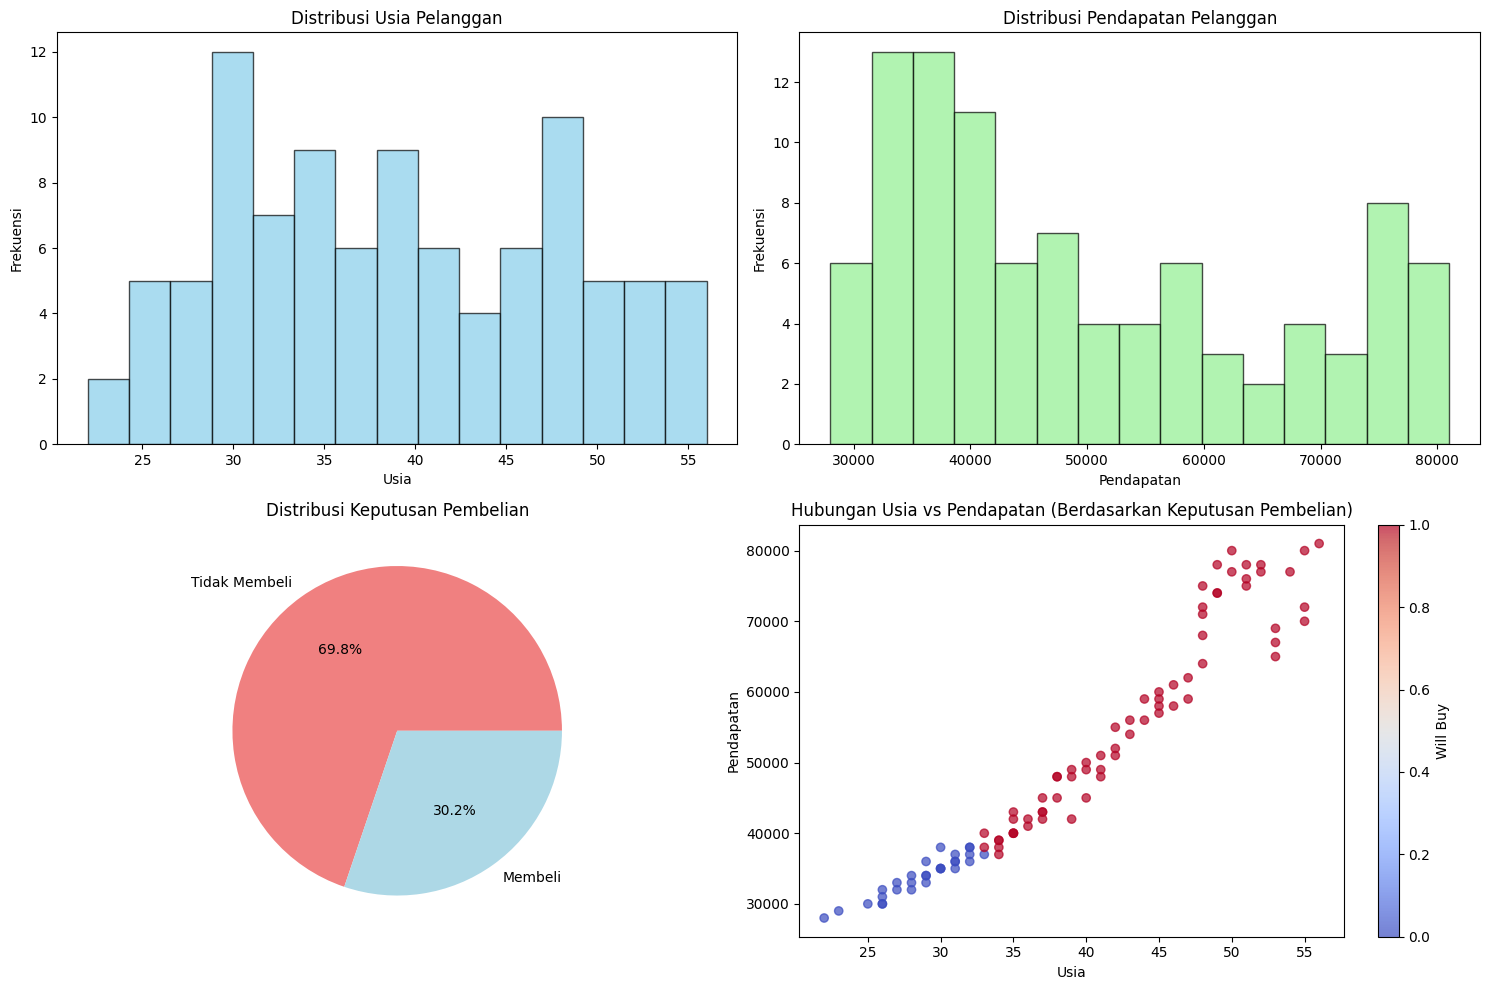



B. METODE KLASIFIKASI
--------------------------------------------------
Metode klasifikasi yang digunakan pada penelitian ini adalah:
1. Random Forest
   - Ensemble method yang menggabungkan multiple decision trees
   - Mengurangi overfitting dengan teknik bagging
   - Dapat memberikan feature importance dan robust terhadap outliers

2. Logistic Regression
   - Algoritma linear yang menggunakan fungsi sigmoid
   - Memberikan probabilitas prediksi dan interpretable coefficients
   - Efisien secara komputasi dan cocok untuk data yang linearly separable


C. HASIL DAN PEMBAHASAN
--------------------------------------------------

C.1 DATA SPLITTING DAN PREPROCESSING
------------------------------
Tahap klasifikasi dimulai dengan membaca data dan memisahkan data menjadi variabel X dan Y,
dimana X adalah atribut (age, income) dan Y adalah target (will_buy).
Data dipisahkan menjadi data training (80%) dan testing (20%).
Jumlah data training: 76
Jumlah data testing: 20
Data juga distandard

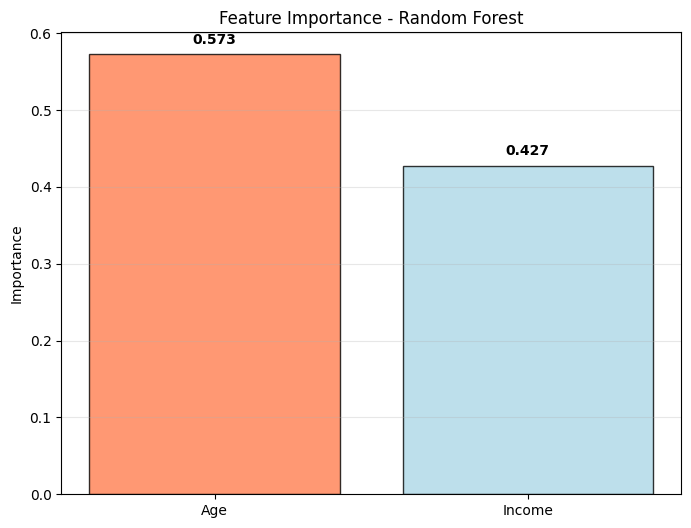

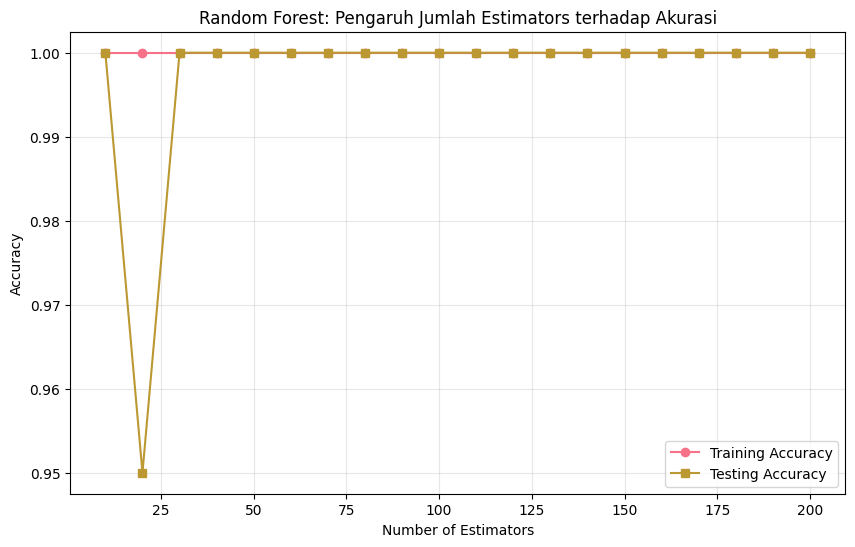



C.3 MODEL LOGISTIC REGRESSION
------------------------------
Logistic Regression menggunakan fungsi sigmoid untuk memetakan nilai linear
ke probabilitas antara 0 dan 1, cocok untuk klasifikasi biner.
Best parameters untuk Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9867


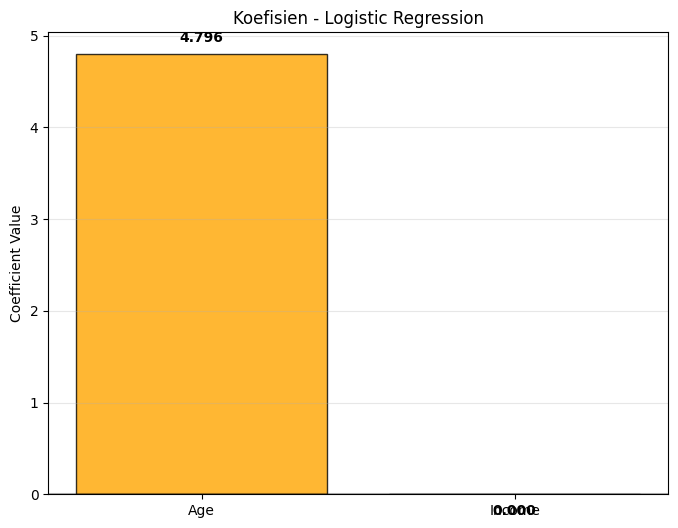

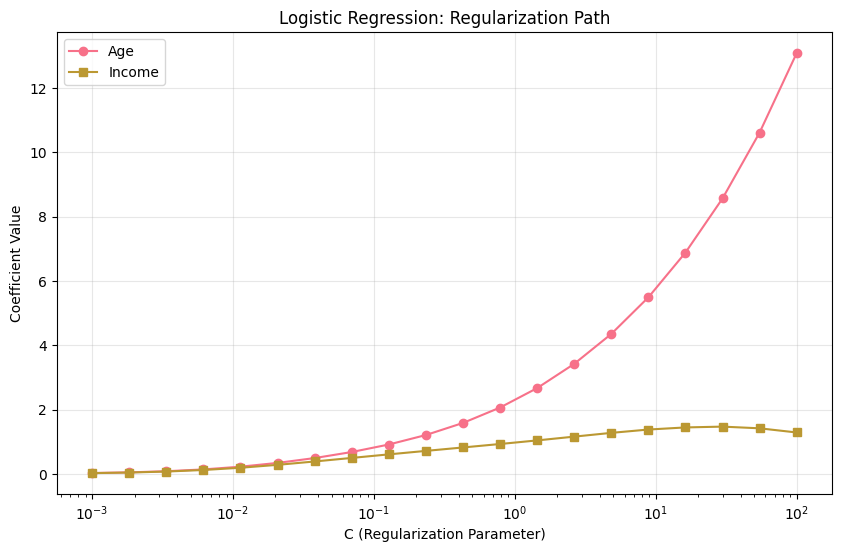



C.4 CONFUSION MATRIX
------------------------------
Confusion matrix menampilkan performa prediksi algoritma dengan membandingkan
prediksi dengan nilai aktual.


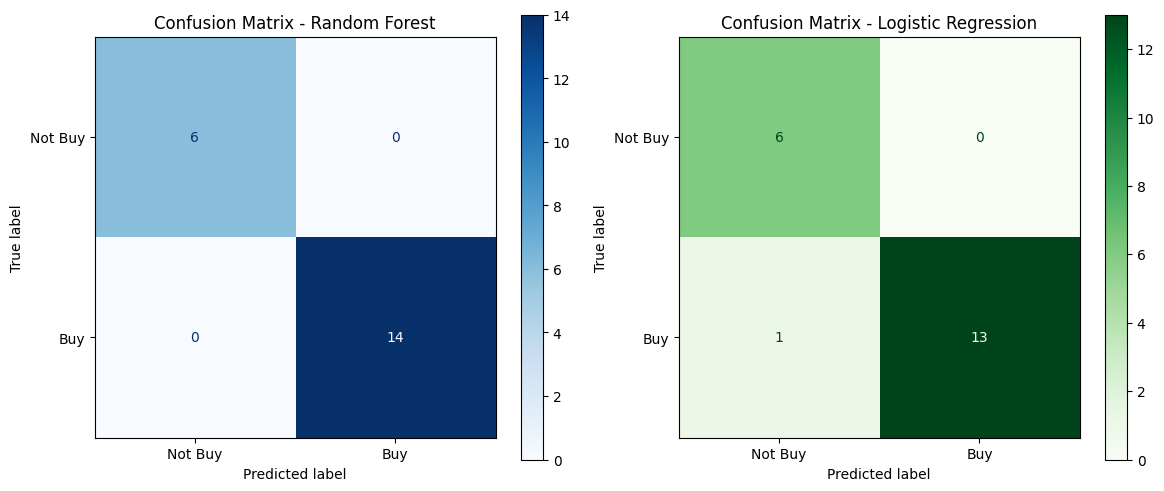


Confusion Matrix Random Forest:
[[ 6  0]
 [ 0 14]]

Confusion Matrix Logistic Regression:
[[ 6  0]
 [ 1 13]]


C.5 CLASSIFICATION REPORT
------------------------------
Classification report mengukur kualitas prediksi dengan metrik:
- Precision: Proporsi prediksi positif yang benar
- Recall: Proporsi data positif yang berhasil diprediksi
- F1-score: Harmonic mean dari precision dan recall
- Accuracy: Proporsi total prediksi yang benar

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.93      0.96

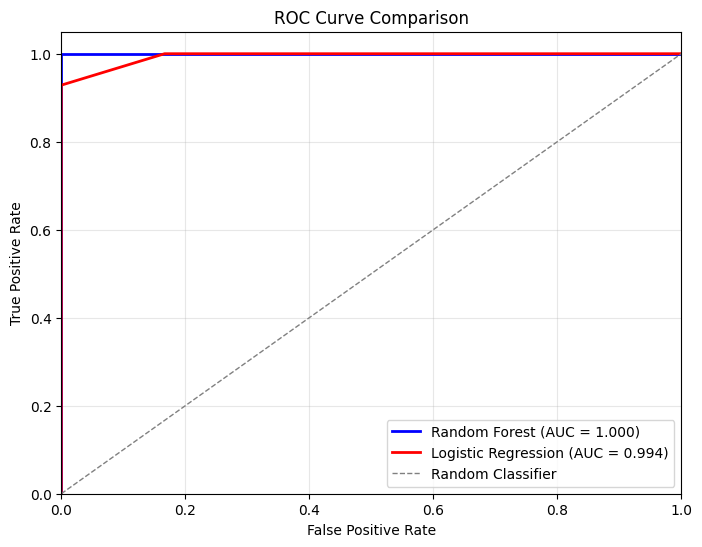

AUC Score Random Forest: 1.0000
AUC Score Logistic Regression: 0.9940


C.7 ANALISIS TAMBAHAN DAN VISUALISASI
------------------------------


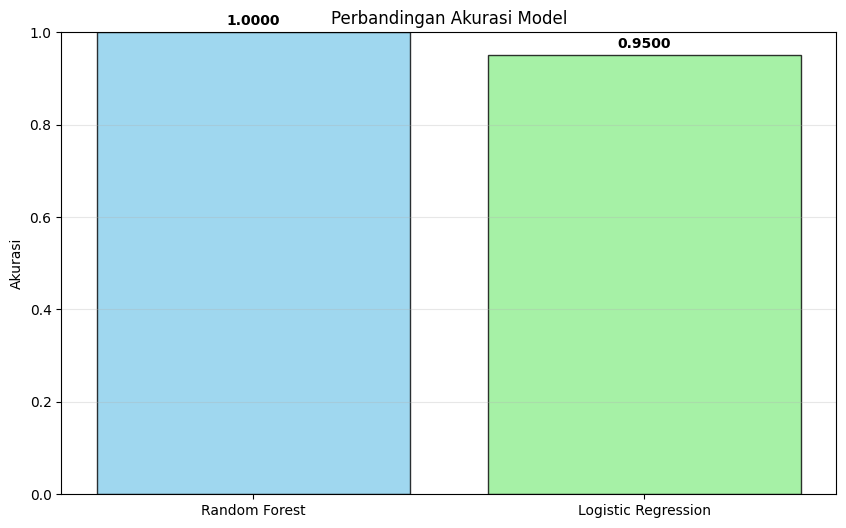

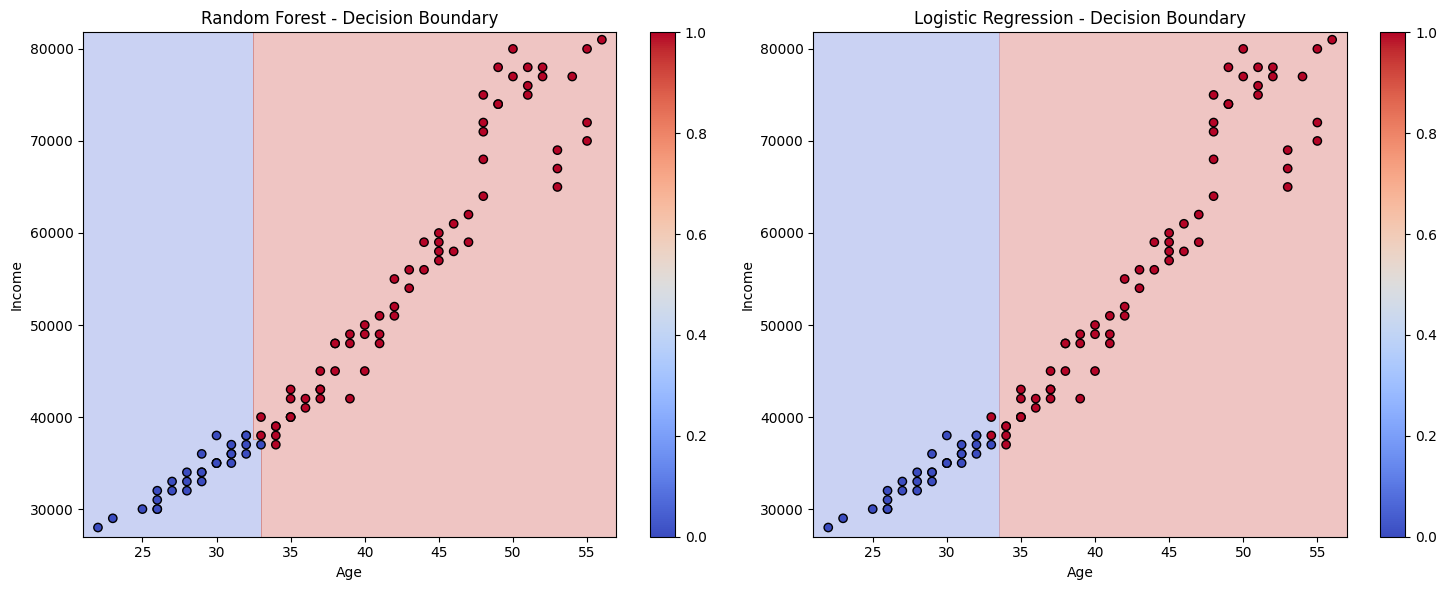



D. KESIMPULAN
--------------------------------------------------
Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa:
1. Random Forest memiliki akurasi sebesar 1.0000 (100.00%)
2. Logistic Regression memiliki akurasi sebesar 0.9500 (95.00%)
3. Random Forest memiliki AUC score sebesar 1.0000
4. Logistic Regression memiliki AUC score sebesar 0.9940
5. Random Forest menunjukkan performa yang lebih baik dibandingkan Logistic Regression
   untuk dataset ini, menunjukkan bahwa data memiliki pola non-linear yang dapat
   ditangkap dengan baik oleh ensemble dari multiple decision trees.
6. Berdasarkan feature importance (Random Forest) dan koefisien (Logistic Regression),
   pendapatan (income) memiliki pengaruh yang dominan dalam menentukan keputusan pembelian.
7. Random Forest memberikan interpretasi melalui feature importance, sedangkan
   Logistic Regression memberikan interpretasi melalui koefisien yang menunjukkan
   arah dan kekuatan hubungan linear.


RINGKASAN PERBAND

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")

print("="*80)
print("PERBANDINGAN KINERJA RANDOM FOREST DAN LOGISTIC REGRESSION")
print("PADA DATA PREDIKSI PEMBELIAN PELANGGAN")
print("="*80)

print("\nA. DATASET")
print("-" * 50)

data = {
    'age': [25,35,45,30,50,28,40,55,32,48,22,39,41,29,33,46,34,36,47,55,26,38,42,51,29,32,37,53,48,27,30,52,31,44,43,35,49,26,34,40,42,51,31,48,54,56,29,37,27,39,45,28,36,53,34,49,30,35,43,52,26,38,47,28,41,44,31,37,55,33,46,49,32,30,38,35,45,41,23,33,48,40,53,42,51,29,26,37,32,34,50,48,35,45,31,39],
    'income': [30000,40000,60000,35000,80000,32000,45000,70000,38000,75000,28000,42000,49000,33000,37000,58000,39000,41000,62000,80000,31000,48000,55000,78000,34000,36000,42000,65000,72000,33000,38000,77000,37000,59000,56000,40000,78000,32000,38000,49000,51000,75000,36000,68000,77000,81000,34000,43000,32000,48000,58000,33000,42000,67000,37000,74000,35000,43000,54000,78000,30000,45000,59000,34000,48000,56000,36000,43000,72000,38000,61000,74000,38000,35000,48000,40000,59000,51000,29000,40000,64000,50000,69000,52000,76000,36000,30000,45000,37000,39000,77000,71000,42000,57000,35000,49000],
    'will_buy': [0,1,1,0,1,0,1,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,1,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,1,0,1,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,1,0,1]
}

df = pd.DataFrame(data)

print(f"Nama Dataset: Customer Purchase Prediction Dataset")
print(f"Jumlah sampel: {len(df)}")
print(f"Jumlah fitur: {df.shape[1] - 1}")
print(f"Target yang diprediksi: will_buy (1 = akan membeli, 0 = tidak akan membeli)")

print("\nAtribut/Fitur:")
print("- age: Usia pelanggan (tahun)")
print("- income: Pendapatan pelanggan (rupiah)")
print("- will_buy: Target variabel (0/1)")

print("\nStatistik Deskriptif:")
print(df.describe())

print("\nDistribusi Target:")
print(df['will_buy'].value_counts())

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].hist(df['age'], bins=15, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribusi Usia Pelanggan')
axes[0,0].set_xlabel('Usia')
axes[0,0].set_ylabel('Frekuensi')

axes[0,1].hist(df['income'], bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].set_title('Distribusi Pendapatan Pelanggan')
axes[0,1].set_xlabel('Pendapatan')
axes[0,1].set_ylabel('Frekuensi')

will_buy_counts = df['will_buy'].value_counts()
axes[1,0].pie(will_buy_counts.values, labels=['Tidak Membeli', 'Membeli'], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[1,0].set_title('Distribusi Keputusan Pembelian')

scatter = axes[1,1].scatter(df['age'], df['income'], c=df['will_buy'], cmap='coolwarm', alpha=0.7)
axes[1,1].set_title('Hubungan Usia vs Pendapatan (Berdasarkan Keputusan Pembelian)')
axes[1,1].set_xlabel('Usia')
axes[1,1].set_ylabel('Pendapatan')
plt.colorbar(scatter, ax=axes[1,1], label='Will Buy')

plt.tight_layout()
plt.show()

print("\n\nB. METODE KLASIFIKASI")
print("-" * 50)
print("Metode klasifikasi yang digunakan pada penelitian ini adalah:")
print("1. Random Forest")
print("   - Ensemble method yang menggabungkan multiple decision trees")
print("   - Mengurangi overfitting dengan teknik bagging")
print("   - Dapat memberikan feature importance dan robust terhadap outliers")
print()
print("2. Logistic Regression")
print("   - Algoritma linear yang menggunakan fungsi sigmoid")
print("   - Memberikan probabilitas prediksi dan interpretable coefficients")
print("   - Efisien secara komputasi dan cocok untuk data yang linearly separable")

print("\n\nC. HASIL DAN PEMBAHASAN")
print("-" * 50)

print("\nC.1 DATA SPLITTING DAN PREPROCESSING")
print("-" * 30)

X = df[['age', 'income']]
y = df['will_buy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardisasi data untuk Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Tahap klasifikasi dimulai dengan membaca data dan memisahkan data menjadi variabel X dan Y,")
print("dimana X adalah atribut (age, income) dan Y adalah target (will_buy).")
print(f"Data dipisahkan menjadi data training (80%) dan testing (20%).")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")
print("Data juga distandardisasi untuk Logistic Regression agar fitur memiliki skala yang sama.")

print("\n\nC.2 MODEL RANDOM FOREST")
print("-" * 30)

print("Random Forest adalah ensemble method yang menggabungkan prediksi dari")
print("multiple decision trees untuk meningkatkan akurasi dan mengurangi overfitting.")

# Hyperparameter tuning untuk Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print(f"Best parameters untuk Random Forest: {rf_grid.best_params_}")
print(f"Best cross-validation score: {rf_grid.best_score_:.4f}")

rf_model = rf_grid.best_estimator_
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Visualisasi feature importance
feature_importance = rf_model.feature_importances_
features = ['Age', 'Income']

plt.figure(figsize=(8, 6))
bars = plt.bar(features, feature_importance, color=['coral', 'lightblue'], alpha=0.8, edgecolor='black')
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance')

for bar, imp in zip(bars, feature_importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{imp:.3f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

# Visualisasi jumlah estimators vs akurasi
n_estimators_range = range(10, 201, 10)
train_scores = []
test_scores = []

for n_est in n_estimators_range:
    rf_temp = RandomForestClassifier(n_estimators=n_est, random_state=42, **{k:v for k,v in rf_grid.best_params_.items() if k != 'n_estimators'})
    rf_temp.fit(X_train, y_train)
    train_scores.append(rf_temp.score(X_train, y_train))
    test_scores.append(rf_temp.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Training Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Testing Accuracy', marker='s')
plt.title('Random Forest: Pengaruh Jumlah Estimators terhadap Akurasi')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n\nC.3 MODEL LOGISTIC REGRESSION")
print("-" * 30)

print("Logistic Regression menggunakan fungsi sigmoid untuk memetakan nilai linear")
print("ke probabilitas antara 0 dan 1, cocok untuk klasifikasi biner.")

# Hyperparameter tuning untuk Logistic Regression
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_param_grid, cv=5, scoring='accuracy')
lr_grid.fit(X_train_scaled, y_train)

print(f"Best parameters untuk Logistic Regression: {lr_grid.best_params_}")
print(f"Best cross-validation score: {lr_grid.best_score_:.4f}")

lr_model = lr_grid.best_estimator_
lr_pred = lr_model.predict(X_test_scaled)
lr_pred_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

# Visualisasi koefisien Logistic Regression
coefficients = lr_model.coef_[0]
plt.figure(figsize=(8, 6))
bars = plt.bar(features, coefficients, color=['orange', 'lightgreen'], alpha=0.8, edgecolor='black')
plt.title('Koefisien - Logistic Regression')
plt.ylabel('Coefficient Value')

for bar, coef in zip(bars, coefficients):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + (0.1 if coef > 0 else -0.1),
             f'{coef:.3f}', ha='center', va='bottom' if coef > 0 else 'top', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.show()

# Visualisasi regularization path
C_range = np.logspace(-3, 2, 20)
coef_path = []

for C in C_range:
    lr_temp = LogisticRegression(C=C, penalty='l2', solver='liblinear', random_state=42)
    lr_temp.fit(X_train_scaled, y_train)
    coef_path.append(lr_temp.coef_[0])

coef_path = np.array(coef_path)

plt.figure(figsize=(10, 6))
plt.plot(C_range, coef_path[:, 0], label='Age', marker='o')
plt.plot(C_range, coef_path[:, 1], label='Income', marker='s')
plt.xscale('log')
plt.title('Logistic Regression: Regularization Path')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n\nC.4 CONFUSION MATRIX")
print("-" * 30)

print("Confusion matrix menampilkan performa prediksi algoritma dengan membandingkan")
print("prediksi dengan nilai aktual.")

rf_cm = confusion_matrix(y_test, rf_pred)
lr_cm = confusion_matrix(y_test, lr_pred)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

disp1 = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=['Not Buy', 'Buy'])
disp1.plot(ax=axes[0], cmap='Blues')
axes[0].set_title('Confusion Matrix - Random Forest')

disp2 = ConfusionMatrixDisplay(confusion_matrix=lr_cm, display_labels=['Not Buy', 'Buy'])
disp2.plot(ax=axes[1], cmap='Greens')
axes[1].set_title('Confusion Matrix - Logistic Regression')

plt.tight_layout()
plt.show()

print("\nConfusion Matrix Random Forest:")
print(rf_cm)
print("\nConfusion Matrix Logistic Regression:")
print(lr_cm)

print("\n\nC.5 CLASSIFICATION REPORT")
print("-" * 30)

print("Classification report mengukur kualitas prediksi dengan metrik:")
print("- Precision: Proporsi prediksi positif yang benar")
print("- Recall: Proporsi data positif yang berhasil diprediksi")
print("- F1-score: Harmonic mean dari precision dan recall")
print("- Accuracy: Proporsi total prediksi yang benar")

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_pred))

print("\n\nC.6 ROC CURVE ANALYSIS")
print("-" * 30)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_pred_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_lr, tpr_lr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()

print(f"AUC Score Random Forest: {roc_auc_rf:.4f}")
print(f"AUC Score Logistic Regression: {roc_auc_lr:.4f}")

print("\n\nC.7 ANALISIS TAMBAHAN DAN VISUALISASI")
print("-" * 30)

rf_accuracy = accuracy_score(y_test, rf_pred)
lr_accuracy = accuracy_score(y_test, lr_pred)

models = ['Random Forest', 'Logistic Regression']
accuracies = [rf_accuracy, lr_accuracy]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'], alpha=0.8, edgecolor='black')
plt.title('Perbandingan Akurasi Model')
plt.ylabel('Akurasi')
plt.ylim(0, 1)

for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.show()

def plot_decision_boundary(model, X, y, title, scaled=False):
    h = 0.02
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1000, X.iloc[:, 1].max() + 1000
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, 200))

    if scaled:
        mesh_points = scaler.transform(np.c_[xx.ravel(), yy.ravel()])
    else:
        mesh_points = np.c_[xx.ravel(), yy.ravel()]

    Z = model.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='coolwarm', edgecolors='black')
    plt.xlabel('Age')
    plt.ylabel('Income')
    plt.title(title)
    plt.colorbar(scatter)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plt.subplot(1, 2, 1)
plot_decision_boundary(rf_model, X, y, 'Random Forest - Decision Boundary')

plt.subplot(1, 2, 2)
plot_decision_boundary(lr_model, X, y, 'Logistic Regression - Decision Boundary', scaled=True)

plt.tight_layout()
plt.show()

print("\n\nD. KESIMPULAN")
print("-" * 50)

print("Berdasarkan analisis yang telah dilakukan, dapat disimpulkan bahwa:")
print(f"1. Random Forest memiliki akurasi sebesar {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"2. Logistic Regression memiliki akurasi sebesar {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"3. Random Forest memiliki AUC score sebesar {roc_auc_rf:.4f}")
print(f"4. Logistic Regression memiliki AUC score sebesar {roc_auc_lr:.4f}")

if rf_accuracy > lr_accuracy:
    print("5. Random Forest menunjukkan performa yang lebih baik dibandingkan Logistic Regression")
    print("   untuk dataset ini, menunjukkan bahwa data memiliki pola non-linear yang dapat")
    print("   ditangkap dengan baik oleh ensemble dari multiple decision trees.")
elif lr_accuracy > rf_accuracy:
    print("5. Logistic Regression menunjukkan performa yang lebih baik dibandingkan Random Forest")
    print("   untuk dataset ini, menunjukkan bahwa hubungan antara fitur dan target bersifat")
    print("   linear dan dapat dimodelkan dengan baik menggunakan fungsi sigmoid.")
else:
    print("5. Kedua model menunjukkan performa yang sama untuk dataset ini.")

print("6. Berdasarkan feature importance (Random Forest) dan koefisien (Logistic Regression),")
print("   pendapatan (income) memiliki pengaruh yang dominan dalam menentukan keputusan pembelian.")
print("7. Random Forest memberikan interpretasi melalui feature importance, sedangkan")
print("   Logistic Regression memberikan interpretasi melalui koefisien yang menunjukkan")
print("   arah dan kekuatan hubungan linear.")

print("\n\nRINGKASAN PERBANDINGAN MODEL:")
print("=" * 70)
print(f"{'Metrik':<20} {'Random Forest':<20} {'Logistic Regression':<20}")
print("=" * 70)
print(f"{'Akurasi':<20} {rf_accuracy:<20.4f} {lr_accuracy:<20.4f}")
print(f"{'AUC Score':<20} {roc_auc_rf:<20.4f} {roc_auc_lr:<20.4f}")
print(f"{'Best n_estimators':<20} {rf_model.n_estimators:<20} {'N/A':<20}")
print(f"{'Best C':<20} {'N/A':<20} {lr_model.C:<20}")
print(f"{'Interpretability':<20} {'Medium':<20} {'Tinggi':<20}")
print(f"{'Handling Non-linear':<20} {'Baik':<20} {'Kurang':<20}")
print(f"{'Overfitting Risk':<20} {'Rendah':<20} {'Rendah':<20}")
print(f"{'Training Time':<20} {'Sedang':<20} {'Cepat':<20}")
print(f"{'Prediction Time':<20} {'Sedang':<20} {'Sangat Cepat':<20}")
print("=" * 70)